## Bajaj Finance Limited (BAJFINANCE.NS

- Bajaj Finance Ltd is engaged in the business of retail financing. 
- The company is engaged in providing finance for two-wheelers, consumer durables, personal computers, personal loans, insurance services, etc.
- They also extended their product line with the launch of IPO financing for high networth customers. 
- The company plans to introduce new products, thus increasing its product portfolio as well as widen its presence in semi-urban and rural markets.
- It is listed on the BSE with a BSE Code of 500034 and the NSE with an NSE Code of BAJFINANCE.

[https://www.moneycontrol.com/india/stockpricequote/finance-leasinghire-purchase/bajajfinance/BAF]

#### Scope of the Project 
- Use the historical time series information of the Stock price and Build a model which can forcast next n time period. 


### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### import Dataset
## Note : The Data can be downloaded from yahoon finance for a given date time

DATA_PATH = 'BAJFINANCE.NS.csv'

bajfinanace_raw = pd.read_csv(DATA_PATH)

In [3]:
bajfinanace_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,5.23974,5.54093,5.23974,5.41268,0.063028,21923.0
1,2002-07-02,5.52344,5.53704,5.42142,5.44377,0.063391,61045.0
2,2002-07-03,5.50595,5.54579,5.32815,5.46612,0.063651,34161.0
3,2002-07-04,5.50109,5.57202,5.41754,5.52830,0.064375,27893.0
4,2002-07-05,5.56327,5.65655,5.47486,5.59048,0.065099,58976.0


In [4]:
bajfinanace_raw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4.397000e+03
mean,571.633174,580.018491,561.799821,571.092635,554.207986,6.130045e+05
std,1019.555198,1033.072861,1003.010378,1018.434699,1021.303140,1.237908e+06
min,3.673550,4.081610,3.673550,4.064120,0.047325,0.000000e+00
25%,25.915001,26.708799,25.275700,25.805201,8.966654,6.866100e+04
50%,63.638599,64.901604,62.356098,63.604599,40.334492,1.993500e+05
75%,547.500000,556.989990,541.099976,546.044983,520.257874,6.967300e+05
max,4867.899902,4923.399902,4853.750000,4880.450195,4869.258301,2.148606e+07


- The Minimum Open price of the stock was 3.67 and highest was 4867.89. 
- Standard Deviation is 1019.555198 for Open Stock Price suggest the volatility of the Stock opening price. 
- Other the period the stock price has grown to 1326 times since inceptions.

### Filling Missing Values with Nearest Values

In [5]:
bajfinanace_clean = bajfinanace_raw['Open'].interpolate(method='nearest')

In [6]:
del bajfinanace_raw

# Split Train and Test

We will be looking at the Opening Price of the Stoock 

In [7]:
bajfinanace_complete = np.reshape(bajfinanace_clean.values, (-1, 1))
bajfinanace_complete 

array([[   5.23974 ],
       [   5.52344 ],
       [   5.50595 ],
       ...,
       [2365.050049],
       [2200.      ],
       [2130.      ]])

## Data Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

bajfinanace_scaled = scaler.fit_transform(bajfinanace_complete)
bajfinanace_scaled

array([[3.21981316e-04],
       [3.80305082e-04],
       [3.76709443e-04],
       ...,
       [4.85457774e-01],
       [4.51526366e-01],
       [4.37135589e-01]])

In [9]:
bajfinanace_train = bajfinanace_scaled[0:3552]
bajfinanace_test  = bajfinanace_scaled[3552:]

## Convert Training Data to Right Shape

In a Time series problem, We have to predict a value at time t based on the data from days t-n where n can be any numbers of steps.

Out feature Set should contain the opening stock price values for the past 180 dasy 
while the lable or dependent variable should be the stock at the 181 day.

In [10]:
feature_set = []
labels = []

for i in range(180,3552):
    feature_set.append(bajfinanace_train[i-180:i,0])
    labels.append(bajfinanace_train[i,0])

In [11]:
feature_set, labels = np.array(feature_set), np.array(labels)

### Convert Data to the share on LSTM Model

- We need to convert the Data into a 3-Dimentional format. 
First Dimension is the number of records or rows in the data sets which is 4397. 
Second dimension is the number od time step which in 60
Last one number of indicator which is 1 in our case. 


In [12]:
feature_set = np.reshape(feature_set,(feature_set.shape[0],feature_set.shape[1],1))

In [13]:
feature_set.shape[1]

180

## Building Mode

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [105]:
from random import seed
seed(100)
model = Sequential()
model.add(LSTM(units=50,
              return_sequences = False,
              input_shape = (feature_set.shape[1],1)))

model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

In [112]:
history = model.fit(feature_set,labels,epochs = 10, 
                                        batch_size=25,
                                        verbose=1, 
                                        shuffle=False, 
                                        callbacks=[early_stop]
                   )

Epoch 1/10
3372/3372 [==============================] - 6s 2ms/step - loss: 2.2615e-05 - accuracy: 0.0000e+00
Epoch 2/10
3372/3372 [==============================] - 6s 2ms/step - loss: 1.6572e-05 - accuracy: 0.0000e+00
Epoch 3/10
3372/3372 [==============================] - 6s 2ms/step - loss: 1.7884e-05 - accuracy: 0.0000e+00
Epoch 4/10
3372/3372 [==============================] - 6s 2ms/step - loss: 1.5854e-05 - accuracy: 0.0000e+00
Epoch 5/10
3372/3372 [==============================] - 6s 2ms/step - loss: 2.2494e-05 - accuracy: 0.0000e+00
Epoch 6/10
3372/3372 [==============================] - 6s 2ms/step - loss: 1.5886e-05 - accuracy: 0.0000e+00
Epoch 00006: early stopping


## Loss during training

Text(0.5, 0, 'epoch')

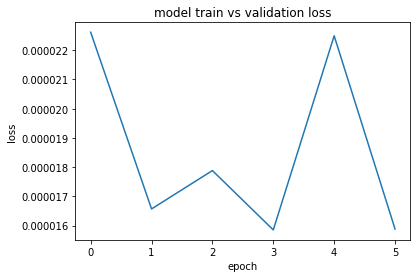

In [113]:
plt.plot(history.history['loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

No handles with labels found to put in legend.


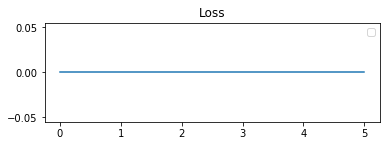

In [114]:
# Loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['accuracy'])
plt.legend()

# ### MSE During Training 
# plt.subplot(212)
# plt.title('Mean Squared Error')
# plt.plot(history.history['mean_squared_error'])
# plt.legend()
# plt.show()

In [115]:
history()

TypeError: 'History' object is not callable

## Prediction

The input of each day should contain the opening stock proce for the previous 60 days.
Which means we need opening stock prices for  889 days and 60 stock proces from last 60 days for the training set. 

In [116]:
past180fromtrain = bajfinanace_train[len(bajfinanace_train)-180:]

In [117]:
test_inputs = np.concatenate([past180fromtrain,bajfinanace_test])

In [118]:
test_inputs.shape[0]

1069

In [119]:
test_features = []
for i in range(180,test_inputs.shape[0]):
    test_features.append(test_inputs[i-180:i,0])

In [120]:
test_features = np.array(test_features)
test_features = np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))

In [121]:
test_features.shape

(889, 180, 1)

In [122]:
predictions = model.predict(test_features)

In [123]:
predictions = scaler.inverse_transform(predictions)
test_data = scaler.inverse_transform(bajfinanace_test)

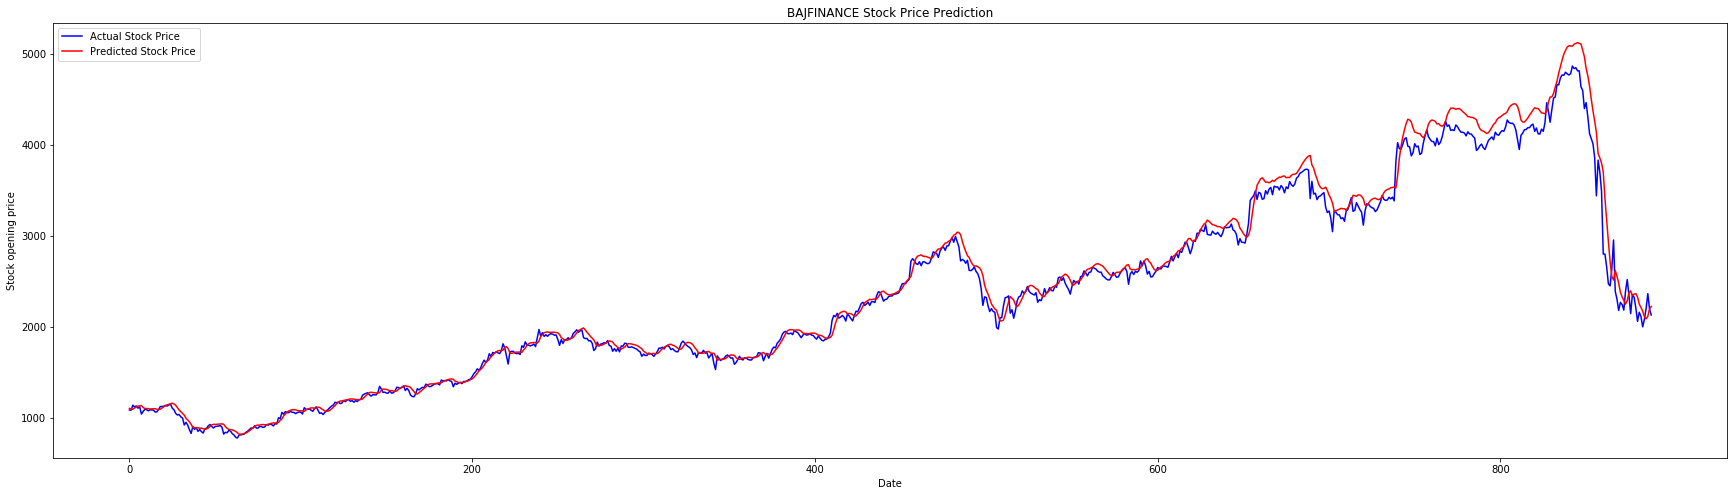

In [124]:
plt.figure(figsize=(30,8))
plt.plot(test_data,color='blue', label = 'Actual Stock Price')
plt.plot(predictions,color='red', label = 'Predicted Stock Price')
plt.title('BAJFINANCE Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock opening price')
plt.legend()
plt.show()

In [125]:
test1_features = np.reshape(test_features[-1],(1,180,1))
# model.predict(test1_features)
#test1_features

In [126]:
prediction1 = model.predict(test1_features)

In [127]:
prediction1 = scaler.inverse_transform(prediction1)
prediction1

array([[2223.7773]], dtype=float32)

In [128]:
predictions

array([[1103.2788 ],
       [1096.4492 ],
       [1092.7109 ],
       [1108.2745 ],
       [1117.4144 ],
       [1128.731  ],
       [1130.13   ],
       [1134.3646 ],
       [1112.8823 ],
       [1101.8094 ],
       [1100.213  ],
       [1099.8683 ],
       [1096.4552 ],
       [1097.308  ],
       [1098.2307 ],
       [1099.2966 ],
       [1093.3186 ],
       [1088.8796 ],
       [1092.7515 ],
       [1107.1526 ],
       [1119.9597 ],
       [1130.8346 ],
       [1141.832  ],
       [1147.0219 ],
       [1153.2008 ],
       [1160.3611 ],
       [1151.3694 ],
       [1136.573  ],
       [1111.7002 ],
       [1085.5471 ],
       [1066.887  ],
       [1046.686  ],
       [1028.7325 ],
       [ 993.7565 ],
       [ 975.6787 ],
       [ 955.7679 ],
       [ 927.26843],
       [ 893.9373 ],
       [ 892.1028 ],
       [ 886.4667 ],
       [ 890.5258 ],
       [ 883.9699 ],
       [ 885.3339 ],
       [ 880.49524],
       [ 871.73254],
       [ 878.06445],
       [ 887.1105 ],
       [ 902.

## Future Predictions 
- Let forcast based on predicted result.

In [147]:


#predict_next 30 days

t = 14

last_60days    = test_features[-1]
t_predictions    = [] 
for i in range(0,t):
    temp = {}
    temp['t'] = i
    last_60days_rs  = np.reshape(last_60days[-180:],(1,180,1))
    next_pred_sc    = model.predict(last_60days_rs)
    next_pred_next  = scaler.inverse_transform(next_pred_sc)
    temp['forecast'] = float(next_pred_next[0])
    
    last_60days = np.concatenate([last_60days,next_pred_sc])
    
    t_predictions.append(temp)
    


In [148]:
predictions_df = pd.DataFrame(t_predictions)
predictions_df.head()

future = predictions_df.forecast[1:].values

In [149]:
predictions_1D = np.reshape(predictions,-1,1)
future_1D = np.reshape(future,(-1,1))

In [150]:
final = list(predictions_1D)+(list(future))

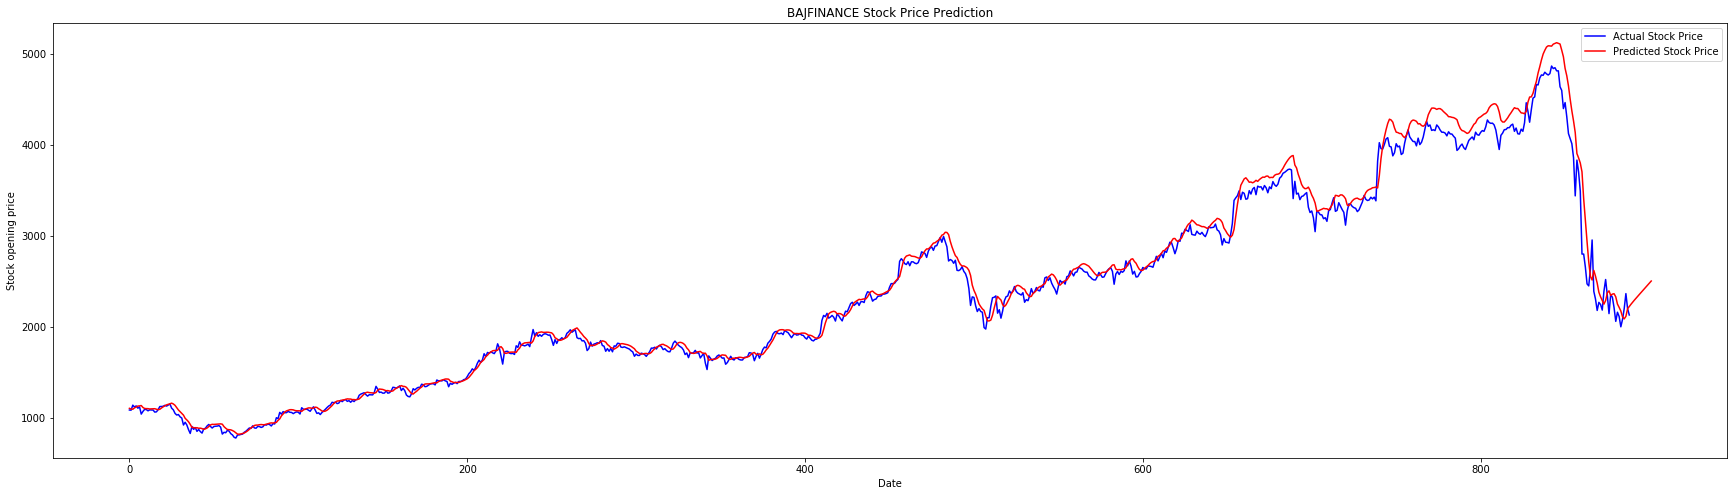

In [151]:
plt.figure(figsize=(30,8))
plt.plot(test_data,color='blue', label = 'Actual Stock Price')
plt.plot(final,color='red', label = 'Predicted Stock Price')
plt.title('BAJFINANCE Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock opening price')
plt.legend()
plt.show()

In [153]:
future_1D

array([[2247.75585938],
       [2270.71704102],
       [2292.92016602],
       [2314.55102539],
       [2335.76025391],
       [2356.67431641],
       [2377.40917969],
       [2398.07226562],
       [2418.76196289],
       [2439.57250977],
       [2460.59130859],
       [2481.89746094],
       [2503.56591797]])

### Conclusion

- As per the Prediction the Stock price will be bunced back to 2503.565. 

- Again this might be wrong and it totally depends on other events in market like the lockdown extention.
